Desafio
Alumno: Israel Pavelek

Consigna:

Consigna: Leer los set de datos w_data.csv y p_data.csv, fusionarlos a partir de la variable que tengan en común (ID)y realizar las siguientes ejercicios:

* Cuantos ID tienen en común. Nombrar cuales no tienen en común

* Corregir los target a solo dos valores distintos ‘<=50k’ y ‘>50k’

* Calcular la proporción que hay entre personas con salarios >50k respecto del total para Entre personas de distinto sexo, Raza y Educacion. Por ejemplo cuál es el porcentaje de mujeres con un salario mayor a 50K y compararlo con el de los hombres. Lo mismo para personas de distintas razas y Educación


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_wdata = pd.read_csv("w_data.csv",sep=";") 
df_pdata = pd.read_csv("p_data.csv",sep=";") 


In [3]:
df_pdata.head()

,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship
0,39.0,Male,49084,White,United-States,Bachelors,13.0,Never-married,Not-in-family
1,50.0,Male,68553,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband
2,38.0,Male,143654,White,United-States,HS-grad,9.0,Divorced,Not-in-family
3,53.0,Male,41510,Black,United-States,11th,7.0,Married-civ-spouse,Husband
4,28.0,Female,195025,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife


In [4]:
df_pdata['ID'].nunique()

48842

In [5]:
df_pdata.shape

(48842, 9)

In [6]:
df_wdata.head()


,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K


In [7]:
df_wdata['ID'].nunique()

48843

In [8]:
df_wdata.shape

(48843, 7)

In [9]:
df=pd.concat([df_wdata,df_pdata])

In [10]:
df.head()


,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.shape

(97685, 15)

In [12]:
print("IDs en comun: " +str(len(df['ID'])-len(df['ID'].drop_duplicates())))


IDs en comun: 48842


El/Los valores que no tienen en comun es/son:

In [13]:
valores=df['ID'].value_counts()
df[df['ID']==valores[valores==1].index[0]]

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship
48842,Self-emp-inc,182148.0,0.0,0.0,60.0,1344995623,>50K.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Punto 2

In [14]:
df=pd.merge(df_wdata,df_pdata)

In [15]:
df["Target"].replace({" <=50K.": "<=50K", " >50K.": ">50K"," <=50K":"<=50K" ," >50K":">50K" }, inplace=True)
df.dropna(subset=['Target'],inplace=True)

In [16]:
df['Target'].unique()

array(['<=50K', '>50K'], dtype=object)

### Punto 3

In [17]:
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [18]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [19]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

### Porcentajes de personas con un salario mayor a 50K por genero

In [20]:
total=0
for i in range (0,len(df[df["Target"]=='>50K'].groupby('Sex').size())):
    total+=df[df["Target"]=='>50K'].groupby('Sex').size()[i]
df[df["Target"]=='>50K'].groupby('Race').size()*100/total

Race
 Amer-Indian-Eskimo     0.470649
 Asian-Pac-Islander     3.499914
 Black                  4.843402
 Other                  0.427862
 White                 90.758172
dtype: float64

<AxesSubplot:ylabel='None'>

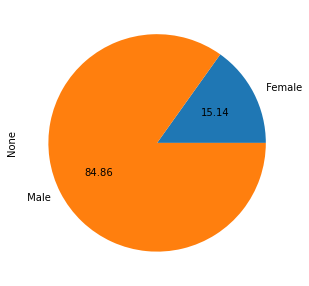

In [21]:
df[df["Target"]=='>50K'].groupby('Sex').size().plot(kind='pie', autopct='%.2f',normalize=True,figsize=(5, 5))

### Porcentajes de personas con un salario mayor a 50K por Raza

In [22]:
total=0
for i in range (0,len(df[df["Target"]=='>50K'].groupby('Race').size())):
    total+=df[df["Target"]=='>50K'].groupby('Race').size()[i]
df[df["Target"]=='>50K'].groupby('Race').size()*100/total

Race
 Amer-Indian-Eskimo     0.470649
 Asian-Pac-Islander     3.499914
 Black                  4.843402
 Other                  0.427862
 White                 90.758172
dtype: float64

<AxesSubplot:ylabel='None'>

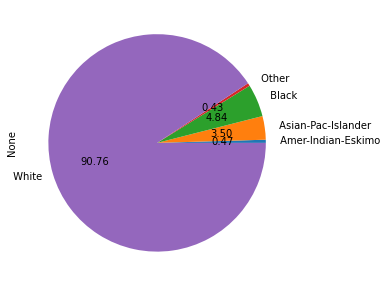

In [23]:
df[df["Target"]=='>50K'].groupby('Race').size().plot(kind='pie', autopct='%.2f',normalize=True,figsize=(5, 5))


### Porcentajes de personas con un salario mayor a 50K por Educacion recibida

In [24]:
total=0
for i in range (0,len(df[df["Target"]=='>50K'].groupby('Education').size())):
    total+=df[df["Target"]=='>50K'].groupby('Education').size()[i]
df[df["Target"]=='>50K'].groupby('Education').size()*100/total

Education
 10th             0.744481
 11th             0.787267
 12th             0.410748
 1st-4th          0.068458
 5th-6th          0.231046
 7th-8th          0.530549
 9th              0.350847
 Assoc-acdm       3.534143
 Assoc-voc        4.466883
 Bachelors       28.341605
 Doctorate        3.688174
 HS-grad         21.418792
 Masters         12.485025
 Preschool        0.008557
 Prof-school      5.279822
 Some-college    17.653603
dtype: float64

<AxesSubplot:ylabel='None'>

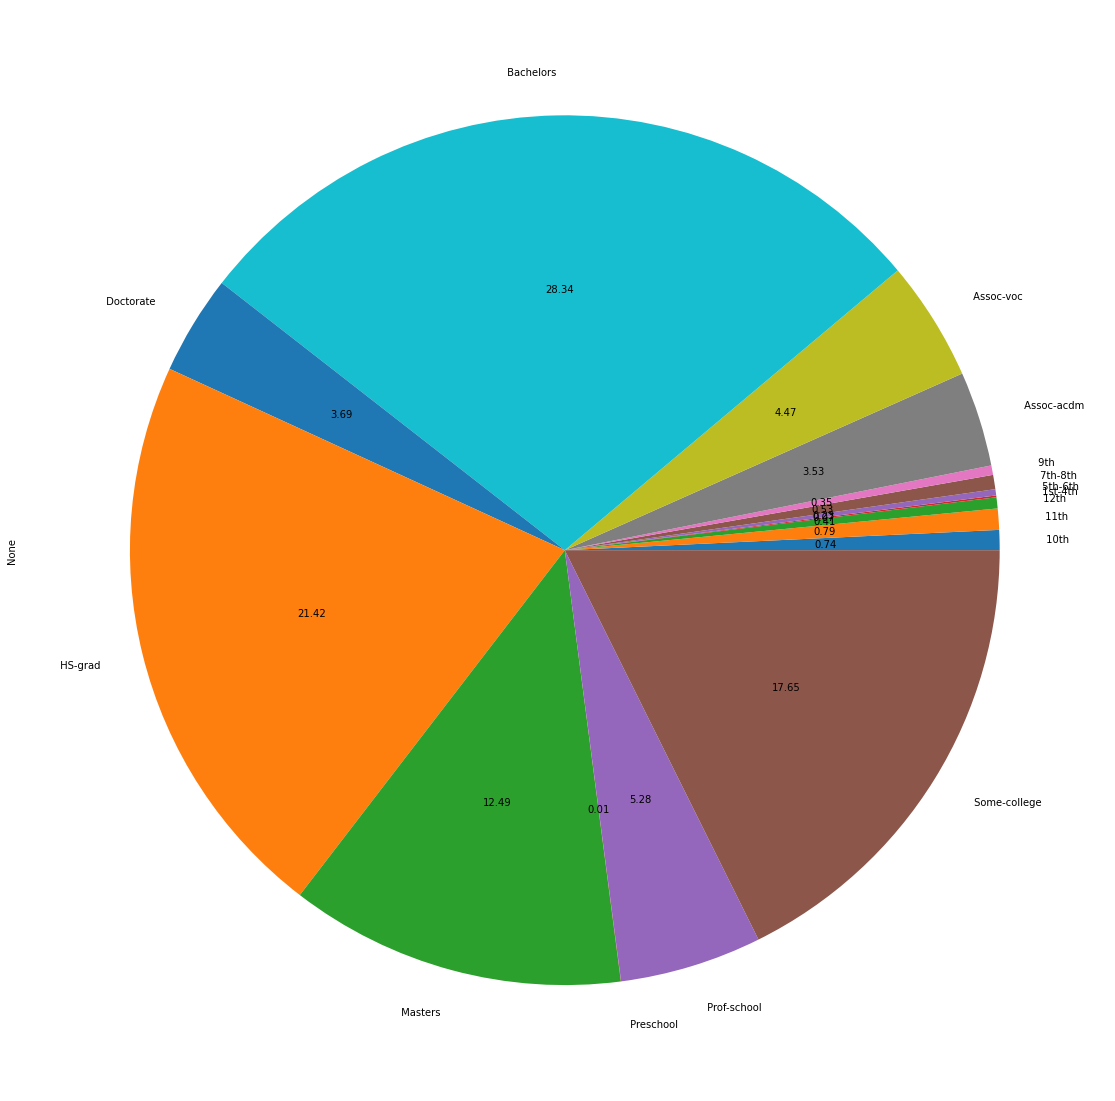

In [27]:
df[df["Target"]=='>50K'].groupby('Education').size().plot(kind='pie', autopct='%.2f',normalize=True,figsize=(20, 20))